# Decision Tree

In [1]:
import pandas as pd
from matplotlib import pyplot

In [2]:
df_raw = pd.read_csv('./data/titanic.csv')
df_raw.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [3]:
df_dropped_cols = df_raw.drop(['Fare', 'Name'], axis='columns')

In [4]:
df = df_dropped_cols.copy()
df['Sex'] = df_dropped_cols['Sex'].apply(lambda x: x == 'male')
df.head()

,Survived,Pclass,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


In [5]:
df.columns = ['Survived', 'Pclass', 'Male', 'Age', 'SibSp', 'ParCh']
print(df.shape)
print(df.dtypes)
df.head()

(887, 6)
Survived      int64
Pclass        int64
Male           bool
Age         float64
SibSp         int64
ParCh         int64
dtype: object


,Survived,Pclass,Male,Age,SibSp,ParCh
0,0,3,True,22.0,1,0
1,1,1,False,38.0,1,0
2,1,3,False,26.0,0,0
3,1,1,False,35.0,1,0
4,0,3,True,35.0,0,0


## Data Preparation

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X = df[['Pclass', 'Male', 'Age', 'SibSp', 'ParCh']]
y = df.Survived
print(X.head())
print(y.head())

   Pclass   Male   Age  SibSp  ParCh
0       3   True  22.0      1      0
1       1  False  38.0      1      0
2       3  False  26.0      0      0
3       1  False  35.0      1      0
4       3   True  35.0      0      0
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Model

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
tree = DecisionTreeClassifier(max_depth=2, random_state=0)

In [11]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

## Evaluation

In [12]:
from sklearn.metrics import accuracy_score
import seaborn as sns

In [13]:
y_train_pred = tree.predict(X_train)
y_test_pred = tree.predict(X_test)

In [14]:
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(train_accuracy, test_accuracy)

0.8048387096774193 0.7640449438202247


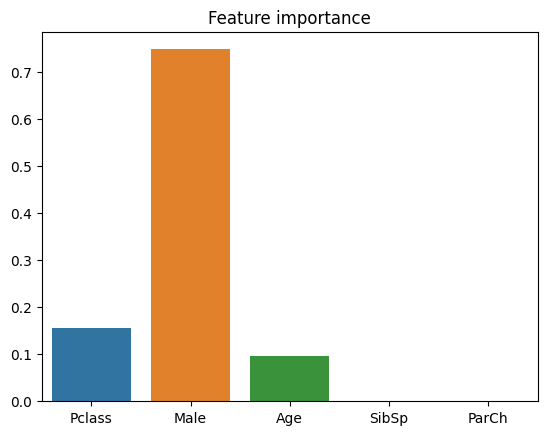

In [15]:
importances = tree.feature_importances_

data = pd.DataFrame([importances], columns=X.columns)

sns.barplot(data)
pyplot.title('Feature importance')
pyplot.show()